In [631]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [632]:
titanic=pd.read_csv('titanic_train.csv')

In [633]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [634]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [635]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [636]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

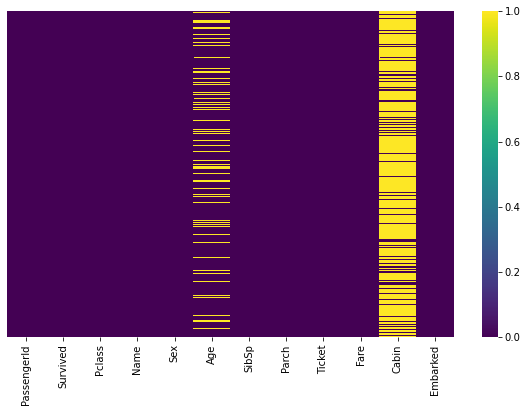

In [637]:
plt.figure(figsize=(10,6))
sns.heatmap(data=titanic.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [638]:
titanic.drop(columns=['Cabin'],axis=1,inplace=True)

In [639]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [640]:
from sklearn.impute import SimpleImputer

In [641]:
imp_mean=SimpleImputer(missing_values=np.NAN,strategy='mean')

In [642]:
titanic.loc[:,['Age']]=imp_mean.fit_transform(titanic.loc[:,['Age']])

In [643]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


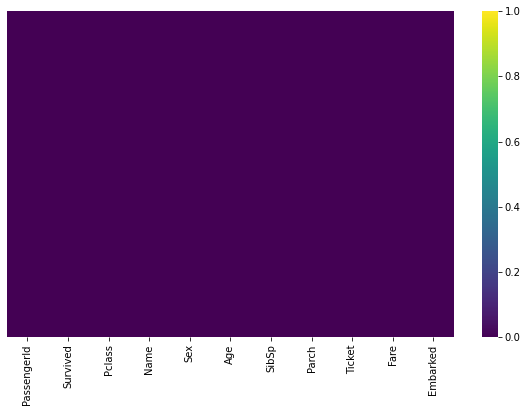

In [644]:
plt.figure(figsize=(10,6))
sns.heatmap(data=titanic.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [645]:
titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [646]:
from sklearn.preprocessing import LabelEncoder

In [647]:
le=LabelEncoder()

In [648]:
titanic.loc[:,['Sex']]=le.fit_transform(titanic.loc[:,['Sex']])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [649]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [650]:
titanic.loc[:,['Embarked']]=le.fit_transform(titanic.loc[:,['Embarked']].astype('str'))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [651]:
titanic.loc[:,['Embarked']]

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [652]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [653]:
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [654]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [655]:
from scipy.stats import zscore

In [656]:
zs=zscore(titanic)

In [657]:
zs

array([[-0.78927234,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58111394],
       [ 1.2669898 , -1.56610693, -1.35557354, ..., -0.47367361,
         0.78684529, -1.93846038],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.48885426,  0.58111394],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  2.00893337,
        -0.17626324,  0.58111394],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.47367361,
        -0.04438104, -1.93846038],
       [-0.78927234,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49237783, -0.67867322]])

In [658]:
titanic.shape

(891, 8)

In [659]:
titanic=titanic[(zs<3).all(axis=1)]

In [660]:
titanic.shape

(820, 8)

In [661]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [662]:
print(titanic['Parch'].unique())
print('\n')
print(titanic['Parch'].value_counts())

[0 1 2]


0    664
1    103
2     53
Name: Parch, dtype: int64


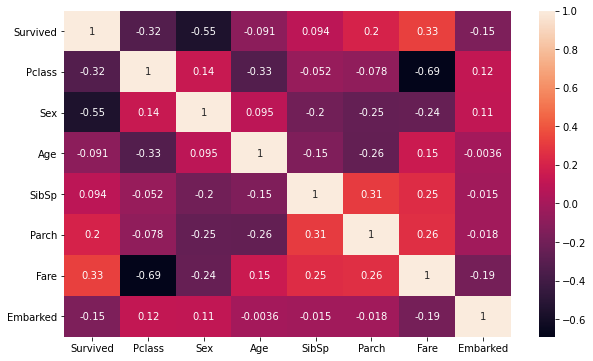

In [663]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(),annot=True)
plt.show()

In [664]:
titanic.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.257511
dtype: float64

In [665]:
for cols in titanic.columns:
    if (titanic.skew().loc[cols]>0.55):
        titanic.loc[:,cols]=np.log1p(titanic.loc[:,cols])

In [666]:
titanic.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.292829
Parch       1.832391
Fare        0.196364
Embarked   -1.257511
dtype: float64

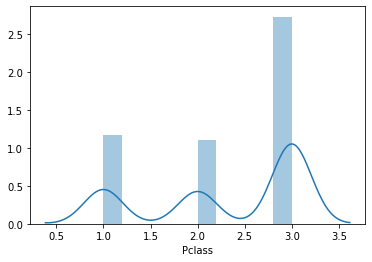

In [667]:
sns.distplot(titanic['Pclass'])
plt.show()

In [668]:
from sklearn.preprocessing import StandardScaler

In [669]:
sc=StandardScaler()

In [670]:
final_titanic=sc.fit_transform(titanic)

In [671]:
final_titanic=pd.DataFrame(final_titanic,columns=titanic.columns)

In [672]:
final_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.80,0.833995,0.722036,-0.641702,1.289936,-0.469469,-0.839435,0.577898
1,1.25,-1.586804,-1.384973,0.675821,1.289936,-0.469469,1.584199,-1.949444
2,1.25,0.833995,-1.384973,-0.312321,-0.607791,-0.469469,-0.751615,0.577898
3,1.25,-1.586804,-1.384973,0.428785,1.289936,-0.469469,1.260629,0.577898
4,-0.80,0.833995,0.722036,0.428785,-0.607791,-0.469469,-0.736084,0.577898


In [673]:
final_titanic.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.292829
Parch       1.832391
Fare        0.196364
Embarked   -1.257511
dtype: float64

In [674]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import math

In [675]:
X=final_titanic.drop(columns='Survived')
y=final_titanic['Survived'].astype('str')

In [676]:
def model_select(logmodel):
    max_score=0
    final_num=0
    for x_num in range(42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x_num)
        lr=logmodel()
        lr.fit(X_train,y_train)
        y_predict=lr.predict(X_test)
        r_score=r2_score(y_test,y_predict)
        print("Score of {} random state is {}".format(x_num,r_score))
        if max_score<r_score:
            max_score=r_score
            final_num=x_num
    print("Max score was found at {} random state with r2 score {}".format(final_num,max_score))

In [677]:
model_select(LogisticRegression)

Score of 42 random state is 0.2647162911407338
Score of 43 random state is 0.23608174770965473
Score of 44 random state is 0.14308300395256957
Score of 45 random state is -0.0652515723270437
Score of 46 random state is 0.3095158967541821
Score of 47 random state is 0.1942824471126361
Score of 48 random state is 0.1389632107023414
Score of 49 random state is 0.15429958391123444
Score of 50 random state is 0.16871165644171782
Score of 51 random state is 0.05299941758881799
Score of 52 random state is 0.1583850931677021
Score of 53 random state is 0.15208403173538976
Score of 54 random state is 0.07339867791201304
Score of 55 random state is -0.014221556886227393
Score of 56 random state is 0.163293310463122
Score of 57 random state is 0.07290314969918621
Score of 58 random state is 0.22229580573951468
Score of 59 random state is 0.12778091473743658
Score of 60 random state is 0.14751655629139082
Score of 61 random state is 0.13481572756805227
Score of 62 random state is 0.011625256439480

In [726]:
#LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
r_score=r2_score(y_test,y_predict)


mse=mean_squared_error(y_test,y_predict)
rmse=math.sqrt(mean_squared_error(y_test,y_predict))

print("MSE is {}".format(mse))
print("r2score is {}".format(r_score))

MSE is 0.7133394833948339
r2score is 0.3095158967541821


In [727]:
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

        -0.8       0.83      0.88      0.85       153
        1.25       0.83      0.77      0.80       118

    accuracy                           0.83       271
   macro avg       0.83      0.82      0.83       271
weighted avg       0.83      0.83      0.83       271

0.8302583025830258


In [728]:
#SupportVectorClassifier
sc=SVC()
parameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[1.0,10.0,20.0,50.0,100.0,150.0]}
gscv=GridSearchCV(sc,parameters)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 20.0, 50.0, 100.0, 150.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [729]:
sc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [730]:
gscv.best_estimator_

SVC()

In [686]:
gscv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [687]:
gscv.best_params_

{'C': 1.0, 'kernel': 'rbf'}

In [731]:
sc=SVC(C=1.0,kernel='rbf')
sc.fit(X_train,y_train)

SVC()

In [733]:
y_predict=sc.predict(X_test)

mse=mean_squared_error(y_test,y_predict)
rmse=math.sqrt(mean_squared_error(y_test,y_predict))

print("MSE is {}".format(mse))
print("r2score is {}".format(r_score))

MSE is 0.6668173431734317
r2score is 0.3095158967541821


In [724]:
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

        -0.8       0.81      0.94      0.87       153
        1.25       0.90      0.71      0.80       118

    accuracy                           0.84       271
   macro avg       0.86      0.83      0.83       271
weighted avg       0.85      0.84      0.84       271

0.8413284132841329


In [691]:
dtc=DecisionTreeClassifier()

In [692]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [693]:
dtc_paramters={'ccp_alpha':[0.0,1.0,5.0,10.0,20.0,50.0],'criterion':['gini','entropy']}
gscv=GridSearchCV(dtc,dtc_paramters)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 1.0, 5.0, 10.0, 20.0, 50.0],
                         'criterion': ['gini', 'entropy']})

In [694]:
gscv.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini'}

In [695]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [696]:
y_predict=dtc.predict(X_test)

In [697]:
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

        -0.8       0.80      0.86      0.83       153
        1.25       0.80      0.71      0.75       118

    accuracy                           0.80       271
   macro avg       0.80      0.79      0.79       271
weighted avg       0.80      0.80      0.80       271

0.7970479704797048


In [698]:
knn=KNeighborsClassifier()

In [699]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [700]:
knn_parameter={'n_neighbors':[5,10,20,50,100,150,200,250,300]}

In [701]:
gscv=GridSearchCV(knn,param_grid=knn_parameter)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20, 50, 100, 150, 200, 250,
                                         300]})

In [702]:
gscv.best_params_

{'n_neighbors': 10}

In [703]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [704]:
knn=KNeighborsClassifier(n_neighbors=5)

In [705]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [706]:
y_predict=knn.predict(X_test)

In [707]:
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

        -0.8       0.81      0.90      0.85       153
        1.25       0.85      0.72      0.78       118

    accuracy                           0.82       271
   macro avg       0.83      0.81      0.82       271
weighted avg       0.83      0.82      0.82       271

0.8228782287822878
